# Predicting Heart Disease

<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="800" height="100">

Cardiovascular diseases (CVDs) remain a leading cause of mortality globally, with an estimated 17.9 million people succumbing to it annually. The [World Health Organization (WHO)](https://www.who.int/health-topics/cardiovascular-diseases) considers CVDs to be a serious public health challenge and recommends early identification of risk factors as a crucial step towards reducing the burden of these diseases. Risk factors such as unhealthy diet, physical inactivity, and mental illness are known to contribute significantly to the development of CVDs. Therefore, it is imperative to identify these risk factors early on to prevent the onset of CVDs and reduce premature deaths.

## Project and Data Overview

Our R&D company specializes in healthcare solutions and has collected anonymized data from multiple hospitals on several patients to predict the likelihood of a new patient having heart disease in the future. The [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) includes relevant information for each patient, such as personal information and medical data, including whether or not they have had heart disease before.

The dataset features are:

- `Age`: age of the patient [years]
- `Sex`: sex of the patient [M: Male, F: Female]
- `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- `RestingBP`: resting blood pressure [mm Hg]
- `Cholesterol`: serum cholesterol [mm/dl]
- `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
- `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
- `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
- `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- `HeartDisease`: output class [1: heart disease, 0: Normal]

To accurately predict the likelihood of a new patient having heart disease in the future, we will conduct exploratory data analysis on the dataset before building a model.

## Import Libraries and Read Data

To proceed with the Exploratory Data Analysis (EDA) phase, we first need to ensure that the necessary libraries for the project have been imported and the dataset has been loaded into our environment.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read dataset
heart_df = pd.read_csv('heart_disease_prediction.csv')

# View first five rows
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(f'Number of features: {heart_df.shape[1]}')
print(f'Number of observations: {heart_df.shape[0]}')

Number of features: 12
Number of observations: 918


In [4]:
# Check data types of the features
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## EDA: Descriptive Statistics

After examining the list of features and inspecting some of the rows from the dataset, we have identified both categorical and numerical features. The categorical features have a data type of object in this dataset. Notably, two columns - `FastingBS` and `HeartDisease` - have a data type of **int64**, but are categorical variables since they only take the values `0` and `1`.

Our initial focus will be on investigating and analyzing the numerical columns.

In [5]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## EDA: Visualizations

Based on the provided descriptive statistics, we can make the following observations:

- The average age of the patients is approximately ~`53` years.
- The median for `Cholesterol` is higher than its mean by roughly `25` mm/dl, suggesting a left-skewed distribution with possible outliers skewing the distribution.
- `RestingBP` and `Cholesterol` have a minimum value of zero, which is not expected in these variables.
- There don't seem to be any missing values in the columns.

Two observations stand out. First, `RestingBP` and `Cholesterol` having a minimum value of zero seems unlikely. `RestingBP` is the resting blood pressure, and it's unlikely to be zero, while a cholesterol value of zero is also not possible as serum cholesterol is always present in the blood.

Secondly, we need domain expertise to help answer questions like this. For example, we could reach out to a subject matter expert or conduct further research on our own. As per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), serum cholesterol:

> "is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level."

Although these insights do not directly help us with our prediction model, they do provide us with valuable information regarding the quality of our dataset.

We will now move on to explore the categorical features. We will create visualizations to understand how the data is distributed in relation to our target variable -- `HeartDisease`. For example, we will look at how many patients had a resting ECG categorized as ST and how many female patients had heart disease.

In [6]:
# Calculate missing values in all columns
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We'll create a bar chart for each categorical column in the `heart_df` dataset, including `FastingBS` and `HeartDisease`. These charts will display the number of rows for each category in the column, with appropriate axis labels, data labels, and a title to make the visualization clear and informative.

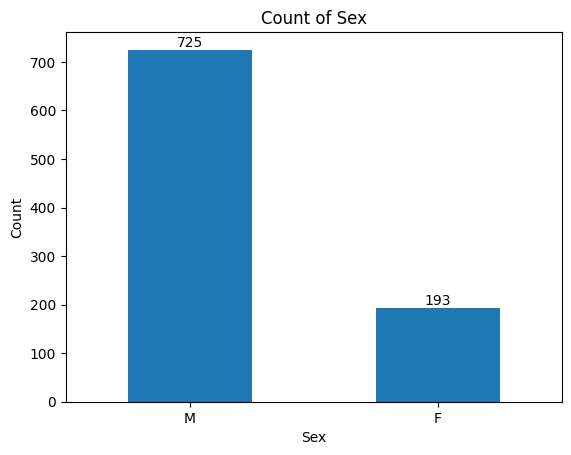

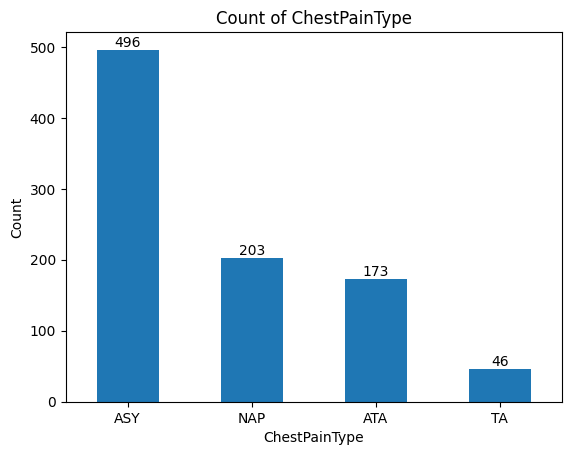

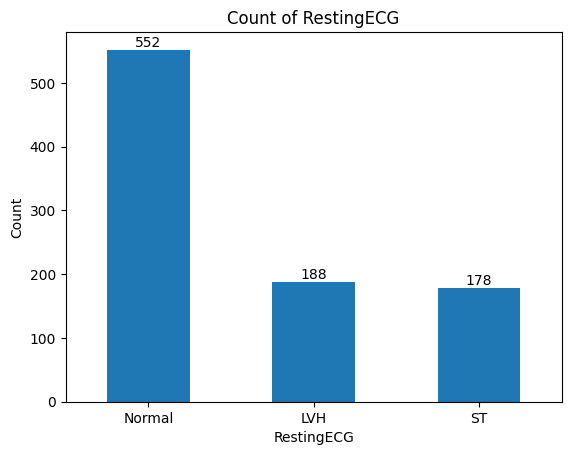

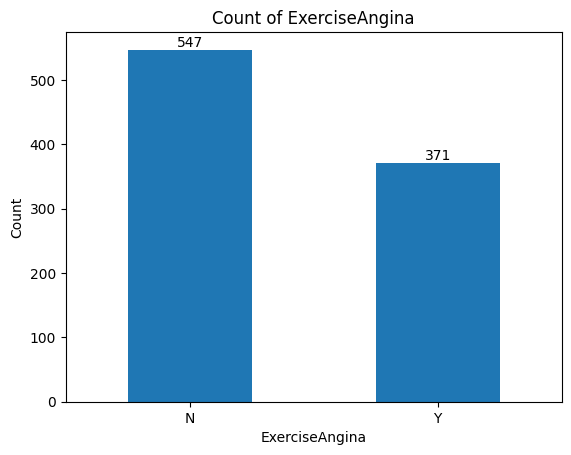

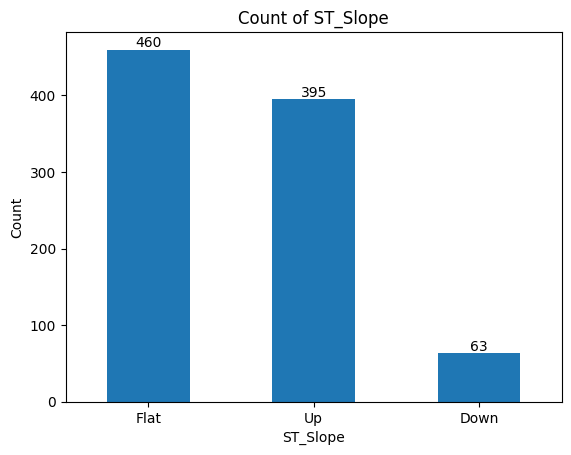

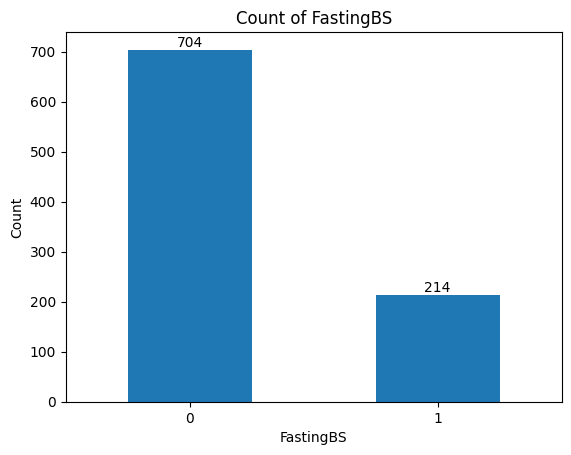

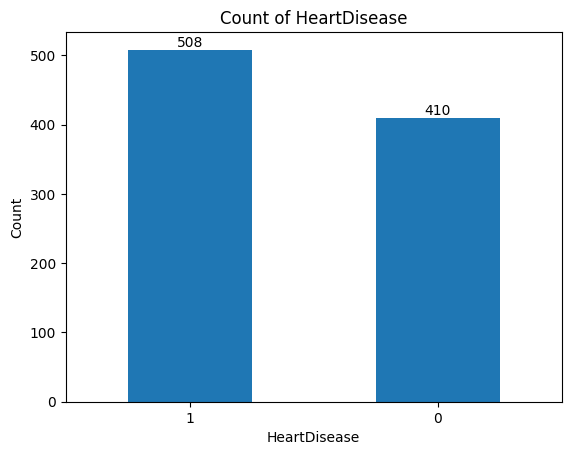

In [18]:
# Create a list of categorical columns
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

# Loop over each categorical column and create a bar chart
for col in cat_cols:
    # Count the number of rows for each category in the column
    counts = heart_df[col].value_counts()
    
    # Create a bar plot of the counts
    ax = counts.plot(kind='bar', rot=0, color='#1f77b4')
    
    # Add labels for the x and y axes
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Add a title for the plot
    ax.set_title(f'Count of {col}')
    
    # Add data labels to the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
    
    # Display the plot
    plt.show()

Here are some relevant insights that can be gathered from the plot of each categorical column:

- There are significantly more male patients (725) than female patients (193).
- Most patients (496) have the type of chest pain known as "ASY" (asymptomatic), followed by "NAP" (non-anginal pain) and "ATA" (atypical angina).
- The majority of patients (552) have a normal resting electrocardiogram (ECG), while 188 have left ventricular hypertrophy (LVH) and 178 have ST-T wave abnormalities.
- There are more patients without exercise-induced angina (547) than with it (371).
- Most patients (460) have a flat ST segment slope during peak exercise, while 395 have an upward sloping ST segment and only 63 have a downward sloping ST segment.
- The majority of patients (704) have a fasting blood sugar level below 120 mg/dl, while 214 have a level equal to or above 120 mg/dl.
- There are more patients with heart disease (508) than without (410).

Now our next step is to create bar charts for every categorical column in the dataset, including `FastingBS`. These bar charts will display the number of rows for each category of that column, grouped by `HeartDisease`.

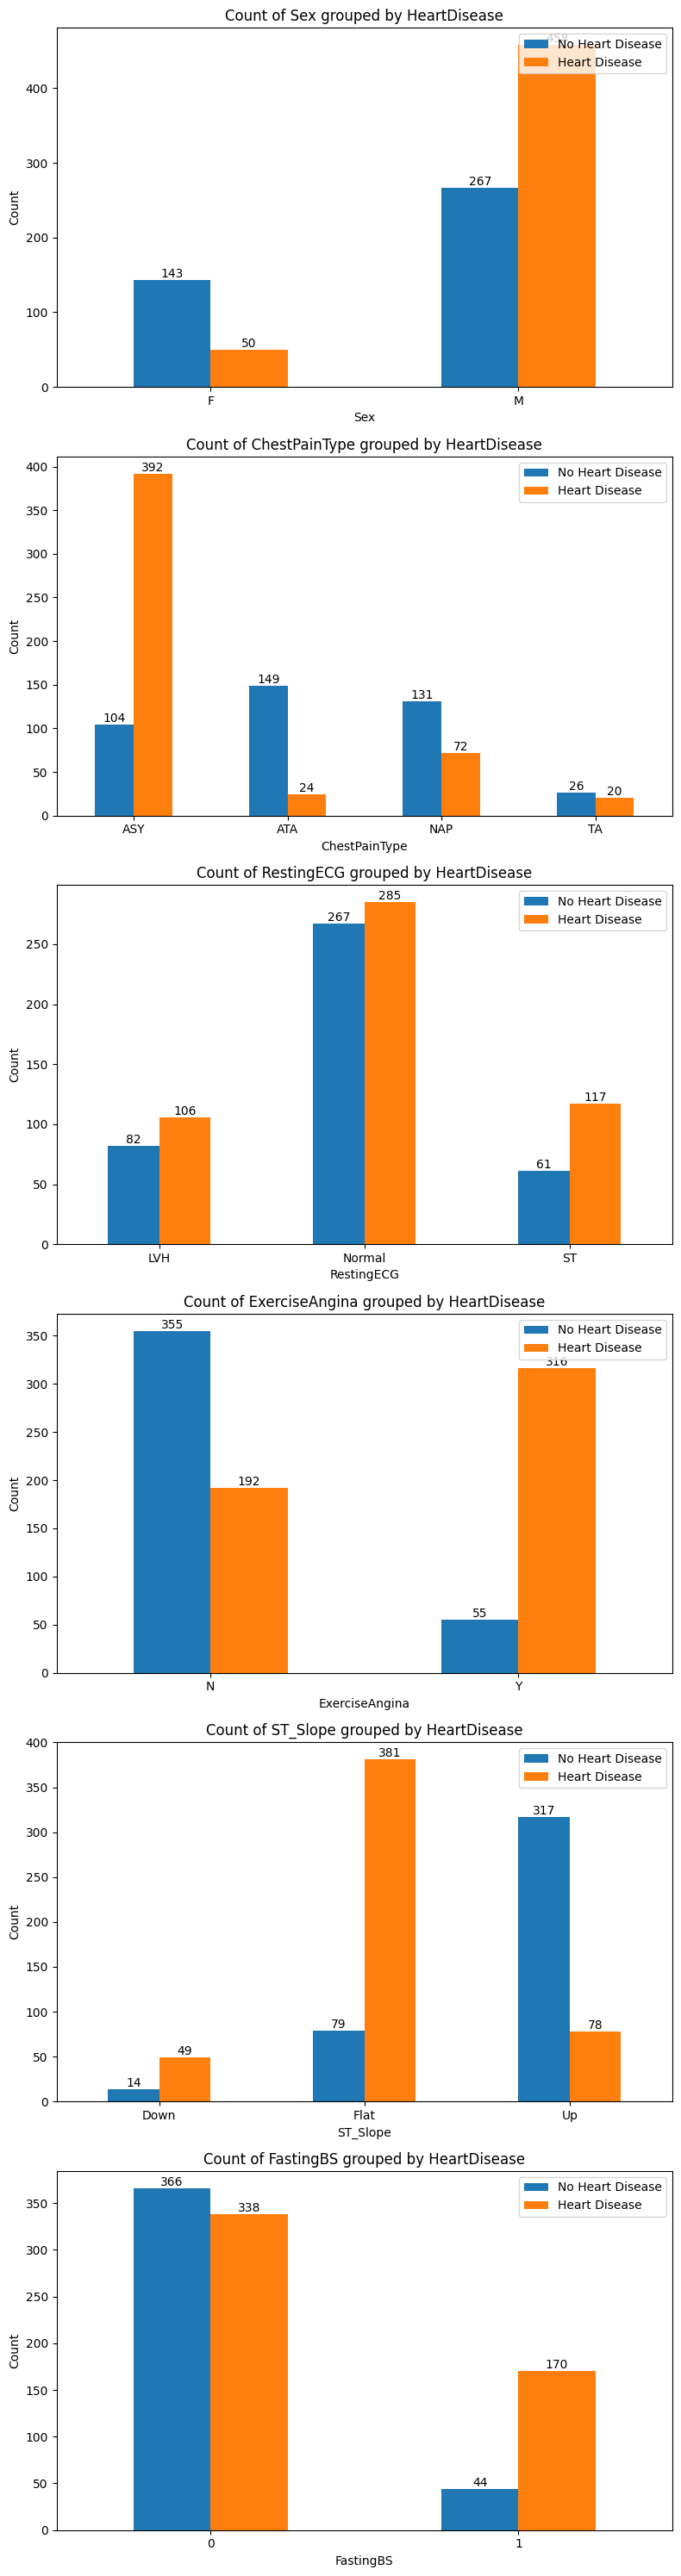

In [21]:
# Exclude 'HeartDisease' column from 'cat_cols' for grouping
cat_cols_2 = cat_cols[:-1]

# Set up figure and axis objects
fig, axes = plt.subplots(nrows=len(cat_cols_2), ncols=1, figsize=(8, 30))

# Loop over categorical columns and create bar chart for each
for i, col in enumerate(cat_cols_2):
    # Group data by HeartDisease and the categorical column
    counts = heart_df.groupby(['HeartDisease', col]).size().reset_index(name='count')
    
    # Create bar chart
    ax = counts.pivot(index=col, columns='HeartDisease', values='count').plot(kind='bar', ax=axes[i], rot=0)
    
    # Add labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {col} grouped by HeartDisease')
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], loc='upper right')
    
    # Add data labels above each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), 
                    textcoords='offset points', ha='center', va='center')
        
plt.tight_layout()
plt.show()

Based on the bar plots, we can make the following observations:

- The number of males with heart disease (458) is much higher than the number of females with heart disease (50).
- ASY is the most common chest pain type among patients with heart disease, while ATA is the most common chest pain type among patients without heart disease.
- The majority of patients, both with and without heart disease, have a normal resting electrocardiogram (ECG).
- Exercise-induced angina is more common among patients with heart disease (316) compared to those without heart disease (55).
- Flat ST slope is the most common type among patients with heart disease, while up-sloping ST segment is the most common among patients without heart disease.
- Patients with heart disease are more likely to have fasting blood sugar levels greater than 120 mg/dL compared to those without heart disease.

We will continue our exploration of the data by creating various groupings and visualizations to extract more insights. Two questions that we will focus on are:

- What percentage of patients with heart disease are male and over 50 years old?
- What is the median age of patients who were diagnosed with heart disease?

We will begin with the first question: `What percentage of patients with heart disease are male and over 50 years old?`

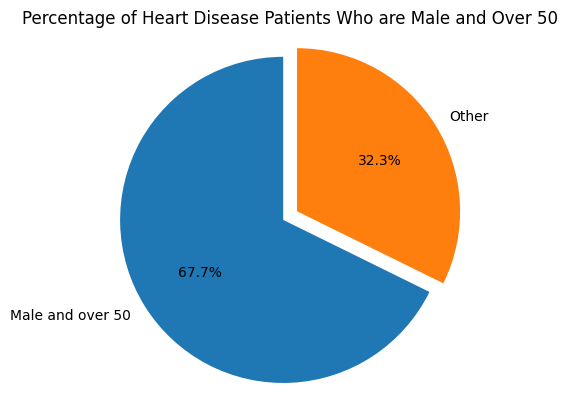

In [9]:
# Filter for patients with heart disease
heart_disease_df = heart_df[heart_df['HeartDisease'] == 1]

# Calculate percentage of patients with heart disease who are male and over 50 years old
male_over_50 = ((heart_disease_df['Sex'] == 'M') & (heart_disease_df['Age'] > 50)).sum()
total_heart_disease = len(heart_disease_df)
percent_male_over_50 = male_over_50 / total_heart_disease * 100

# Create pie chart
labels = ['Male and over 50', 'Other']
sizes = [percent_male_over_50, 100 - percent_male_over_50]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Percentage of Heart Disease Patients Who are Male and Over 50')
plt.show()

The graph above shows that approximately 68% of the patients with heart disease are male and over 50 years old. This is a significant finding as it indicates that there may be a higher risk of developing heart disease in males over 50 years old. This information could be valuable for developing targeted prevention and treatment strategies for this population.

Moving on to the second question: `What is the median age of patients who were diagnosed with heart disease?`

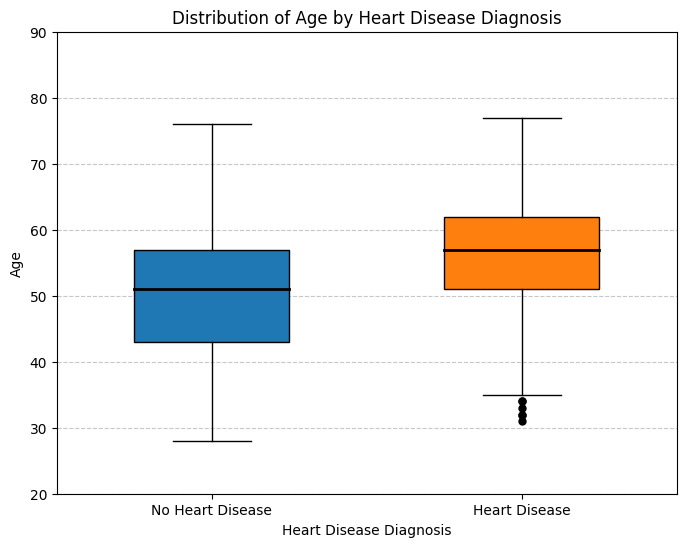

In [12]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create box plot
bp = plt.boxplot(x=[heart_df[heart_df['HeartDisease'] == 0]['Age'], heart_df[heart_df['HeartDisease'] == 1]['Age']],
                 labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, widths=0.5, showfliers=True,
                 flierprops={'marker':'o', 'markerfacecolor':'black', 'markersize':5})

# Set boxplot colors
colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Set axis labels and title
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease Diagnosis')

# Set y-axis range
plt.ylim(20, 90)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Based on the boxplot visualization, we can see that the median age of patients without heart disease is 51 years old, while the median age of patients with heart disease is 57 years old. This suggests that age may be a risk factor for developing heart disease, as the median age of those with heart disease is higher than those without. However, it's important to note that there is overlap in the age distributions of those with and without heart disease, indicating that age is not the only factor influencing the development of heart disease.

## Data Cleaning

In our previous analysis, we calculated the number of missing values in our entire dataset and didn't find any. Additionally, we observed some interesting patterns in our categorical columns:

- The dataset is heavily biased towards male patients with 725 rows compared to only 193 rows for female patients. This could potentially impact the accuracy of our model when making predictions for female patients.
- The target variable `HeartDisease` is relatively evenly distributed, with 410 patients not diagnosed with heart disease and 508 diagnosed with heart disease.
- A significant number of patients diagnosed with heart disease (392) have asymptomatic chest pain (ASY), which implies that chest pain may not always be a reliable predictor of heart disease.
- A high number (170) of patients with blood sugar levels greater than 120 mg/dl were diagnosed with heart disease.

Now, before proceeding with feature selection, we need to clean up our data. We noticed that some columns have 0 values that don't make sense. To handle these values, we have a few options:

- Remove the rows containing these values if their frequency is low.
- Impute the zeros with the median value of the column or the median value of the column grouped by `HeartDisease`.
- Use a more complex approach, such as imputing with the median of the values grouped by age, sex, and/or resting ECG of the patient.

While the third option could potentially provide us with a more accurate result, the size of our dataset is relatively small, so we can ignore it for the time being. Instead, we will determine the number of zero values in our dataset and determine the best approach to handle them based on their frequency of occurrence.